### Deep Learning in practice

#### In this activity I will build a simple cat neural network classifier with TensorFlow 2.0

* Build a neural network that classifies cat images
* Train the neural network
* and finally, evaluate the accuracy of the model

* **PIL** (Python Imaging Library) is the python Imaging library that adds support for opening, manipulating, and saving many different image file formats.
* **random** implements pseudo random number generators for various distributions
* **numpy**  for numpy array manipulation - every image must be embedded into a numpy before it can be used as input for a neural network
* **os** operating system module and allows access to folders and files stored in the hard drive - useful for navigating the file system
* **tensorflow.keras** tensorflow module that will be used to build our neural network model

In [2]:
#importing the required libraries
import tensorflow  as tf 
print(tf.__version__)

#import pillow
from PIL import Image
from random import shuffle, choice

#import numpy arrays library
import numpy as np

#import os module
import os
#import keras and its libs
from tensorflow.keras import datasets, layers, models

#stop the execution from hanging, add this line to run training without interruption
os.environ ['KMP_DUPLICATE_LIB_OK'] = 'True'

2.16.1


### One-Hot Encoding

One-hot encoding takes a string as a parameter, and creates a label to the image.  Note that the label for a cat is  the numpy array [1,0] and the label for no cat is [0,1].  This technique is very common in machine learning.  **One-hot encoding** is a process by which categorical variables from string format to numerical format i.e. are converted into a format that could be provided to an ML algorithm to do a better prediction job.

*In one-hot encoding you create a vector containing all zeros except in one location*

The labels in the training data need to be one-hot encoded!

Think of a one-hot coded array [1,0] being the probability in this example of being or not being a cat

In [3]:
IMAGE_SIZE = 256 # we will be resizing the images to 256x256 pixels, this is a changeable hyperparameter
#increasing image size = longer training time but better accuracy
def one_hot_encode(className):
  '''One-hot encodes a given class'''
  if className == 'cats':return np.array([1,0])
  elif className =='nocats': return np.array([0,1])

In [4]:
print(f'cats: {one_hot_encode('cats')}')
print(f'cats: {one_hot_encode('nocats')}')

cats: [1 0]
cats: [0 1]


#### Loading the training data
The function **load_data** is responsible for loading the dataset.  First we set the IMAGE_DIRECTORY variable to point at the training dataset 'datasets/training_set'

The training data will be loaded into the list **train_data**.  Initially the list is empty.  Then the variable directories will get the tree structure of all directories in the specified path.

**os.walk()** generates the filenames in the directory tree by walking the tree either top-down or bottom-up.  For each directory in the tree rooted at directory top (including itself), it yields a 3-tuple (dirpath, dirnames, filenames)
* root: Prints out directories only from what we have specified
* dirs: Prints out sub-directories from the root
* files: Prints out all files from root and directories.

**os.path.join()** this python method joins one or more components intelligently.  This method concatenates various path components with exactly  one directory separator ('/') following each non-empty part except  the last path component.  If the last path component to be joined is empty then a directory separator('/' is put at the end.  If a path component represents an  absolute path, then all previous components joined are discarded and joining continues from the absolute path component)

In [28]:
# demo for generation of the os.walk(IMAGE_DIRECTORY) generator object and iteration on it
IMAGE_DIRECTORY = 'datasets/training_set'
print(f"os.walk(IMAGE_DIRECTORY: {os.walk(IMAGE_DIRECTORY)}")

#iterate over the generator object
i=0
for root, sub_directories, files in (os.walk(IMAGE_DIRECTORY)):
  print(f'Level {i}')
  print(f'root folder: {root}')
  print(f'sub folders: {sub_directories}')
  print(f'number of files in the root folder: {len(files)}')
  i +=1
  print("-"*35)
  
#returning folders we use the next method
folders = next(os.walk(IMAGE_DIRECTORY))
print(f'paths_tuple in the current directory: \n{folders}')
#returning the root folder
print(f'ROOT FOLDER:{folders[0]}')
#Sub directories in root
print(f'Subdirectories from the root: {folders[1]}')

#access the files
#print(f'Files at the root directory: {folders[2]}')

#directories
training_data_directory = folders[1]
print(f'Training Data Directory: {training_data_directory}')
cats_directory = training_data_directory[0]
nocats_directory = training_data_directory[1]

#reading the images with os.path.join()
joint_path = os.path.join(IMAGE_DIRECTORY,cats_directory)
print(f'Joint Path: {joint_path}')
images_list = next(os.walk(joint_path))[2] # file names are at index 2
print(f'number of images: {len(images_list)}') #prints images
#print(f'Image List: {images_list}')

os.walk(IMAGE_DIRECTORY: <generator object walk at 0x00000232D5CD3CA0>
Level 0
root folder: datasets/training_set
sub folders: ['cats', 'notcats']
number of files in the root folder: 1
-----------------------------------
Level 1
root folder: datasets/training_set\cats
sub folders: []
number of files in the root folder: 4001
-----------------------------------
Level 2
root folder: datasets/training_set\notcats
sub folders: []
number of files in the root folder: 1669
-----------------------------------
paths_tuple in the current directory: 
('datasets/training_set', ['cats', 'notcats'], ['testFile.md'])
ROOT FOLDER:datasets/training_set
Subdirectories from the root: ['cats', 'notcats']
Training Data Directory: ['cats', 'notcats']
Joint Path: datasets/training_set\cats
number of images: 4001


In [61]:
IMAGE_DIRECTORY = 'datasets/training_set'
def load_data (IMAGE_DIRECTORY, number_of_images = 100, shuffle_data = True):
  '''Loads the required image data'''
  print('loading images...')
  train_data =[]
  folders = next(os.walk(IMAGE_DIRECTORY))[1] # getting the sub directories
  
  for folder_name in folders:
    print(f'loading {folder_name}')
    file_names = next(os.walk(os.path.join(IMAGE_DIRECTORY, folder_name)))[2]
    for i in range(number_of_images):
      image_name = choice(file_names)
      image_path=os.path.join(IMAGE_DIRECTORY, folder_name, image_name)
      #print(image_path)
      label = one_hot_encode(folder_name)
      class_name =folder_name
      if "DS_Store" not in  image_path:
        img = Image.open(image_path) #Image.open() is part of the PILLOW library
        img = img.convert('L')
        img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.LANCZOS)
        train_data.append([np.array(img), label, class_name]) # class name is only needed for visualisation 
  if(shuffle_data == True):
    shuffle(train_data)
  print(f'we loaded, {len(train_data)}, images in the training dataset')
  return train_data

#### Using the PILOW library to read image data from the file names

for i in range(number of images):
  image_path = choice(file_names)
  image_path = os.path.join(IMAGE_DIRECTORY, folder_name, image_name)
  label = one_hot_encode(folder_name)
  if "DS_Store" not in image_path:
    img = Image.open(image_path)
    img = img.convert('L')
    img = img.resize((IMAGE_SIZE, IMAGE_SIZE), Image.ANTIALIAS)
    train_data.append([np.array(img), label])

* **choice(file_names):** returns a random item from a list, tuple, or string - file_names is the image list in this case
* **Image.open(image_path):** open an image fro the path specified
* **img.resize:** resizes the image to the specified size
* **ANTIALIAS:** It is a filter that ensures the best quality
* **train_data.append([np.array(img), label]):** add the training images and their labels into the list
* **np.array(img):** cast the image into a numpy array

#### VISUALISE Some Images

In [62]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

IMAGE_DIRECTORY = 'datasets/training_set'
train_data = load_data(IMAGE_DIRECTORY, number_of_images=200)
#print(train_data)

loading images...
loading cats
loading notcats
we loaded, 400, images in the training dataset


label [1 0]
class name: cats


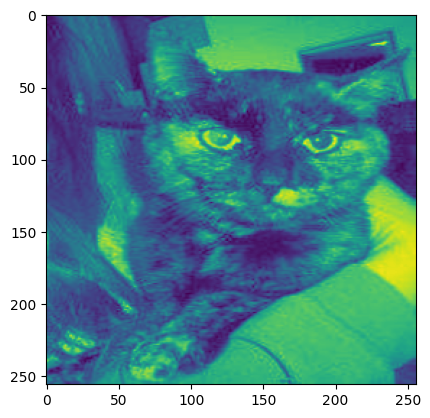

In [63]:
image_index =1
label = train_data[image_index][1]
class_name = train_data[image_index][2]

print(f'label {label}')
print(f'class name: {class_name}')
image = plt.imshow(train_data[image_index][0])